# Qiskit Assignment 4
## Deutsch-Jozsa 

### Learning Objectives
1. Implement the Deustch-Jozsa oracle
2. Run the DJ algorithm on a real quantum computer

### Resources
Qiskit assignments are designed to be collaborative and open internet. Where possible, links to useful documentation will be embedded within questions. You're free to discuss these tasks with TAs and peers, but do write your own solutions. For some questions, there may be additional restrictions on the ways you can solve them. To ensure compliance with course policies and assignment instructions, we reserve the right to inspect your code.

**NAME**: REPLACE WITH YOUR NAME

**STUDENT ID**: REPLACE WITH YOUR STUDENT ID

In [1]:
# Import Qiskit and other needed packages
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
import numpy as np
import pprint

#### Task 1 - Constant Oracle (10 pts)

Return a Deutsch-Josza circuit from the following method as described in class such that
- the output has `n` bits
- the oracle is characterized by $f(x)=1$

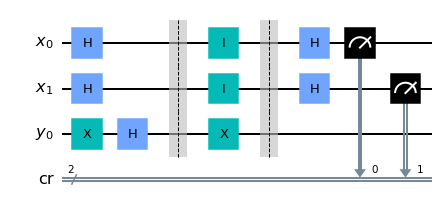

In [2]:
def dj_constant_one(n):
    # BEGIN SOLUTION
    qc = QuantumCircuit()
    qc.add_register(QuantumRegister(n, 'x'))
    qc.add_register(QuantumRegister(1, 'y'))
    qc.add_register(ClassicalRegister(n, 'cr'))

    qc.x(n)
    for i in range(n+1):
        qc.h(i)
    qc.barrier()
    for i in range(n):
        qc.id(i)
    qc.x(n)
    qc.barrier()
    for i in range(n):
        qc.h(i)
        qc.measure(i,i)
    return qc
    # END SOLUTION
    
dj_constant_one(2).draw(output='mpl')   

In [3]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0
failure_message: expected n+1 qubits and n classical bits for an n-bit input
""" # END TEST CONFIG
def test_num_bits1():
    n = 8
    djco = dj_constant_one(n)
    return djco.num_clbits == n and djco.num_qubits == n+1
    
test_num_bits1() == True

True

In [4]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0
failure_message: something looks wrong in the number of gates/measurements used. make sure you're implementing the correct constant function
""" # END TEST CONFIG
def test_fx_equals_1():
    n=11
    ops = dj_constant_one(n).count_ops()
    h = ops['h'] == 2*n+1
    x = ops['x'] == 2
    m = ops['measure'] == n
    return h and x and m
    
test_fx_equals_1() == True

True

In [5]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0
failure_message: circuit does not implement a constant oracle
""" # END TEST CONFIG
def test_constant_output():    
    qasm_sim = BasicAer.get_backend("qasm_simulator")
    job = execute(dj_constant_one(4), qasm_sim)
    counts = job.result().get_counts()
    return len(counts) == 1 and counts['0000'] == 1024
    
test_constant_output() == True

True

In [6]:
""" # BEGIN TEST CONFIG
hidden: false
points: 10
failure_message: one of the above tests is failing
""" # END TEST CONFIG

def test_num_bits1():
    n = 8
    djco = dj_constant_one(n)
    return djco.num_clbits == n and djco.num_qubits == n+1

def test_fx_equals_1():
    n=11
    ops = dj_constant_one(n).count_ops()
    h = ops['h'] == 2*n+1
    x = ops['x'] == 2
    m = ops['measure'] == n
    return h and x and m

def test_constant_output():    
    qasm_sim = BasicAer.get_backend("qasm_simulator")
    job = execute(dj_constant_one(4), qasm_sim)
    counts = job.result().get_counts()
    return len(counts) == 1 and counts['0000'] == 1024

def award_credit1():
    return test_fx_equals_1() and test_constant_output() and test_num_bits1()

award_credit1() == True

True

#### Task 2 - Balanced Oracle (20 pts)
Return a Deutsch-Josza circuit from the following method as described in class such that
- the output has `6` bits
- the oracle is characterized by a balanced function
- all amplitude in the resulting state is placed on the $|010011\rangle$ term

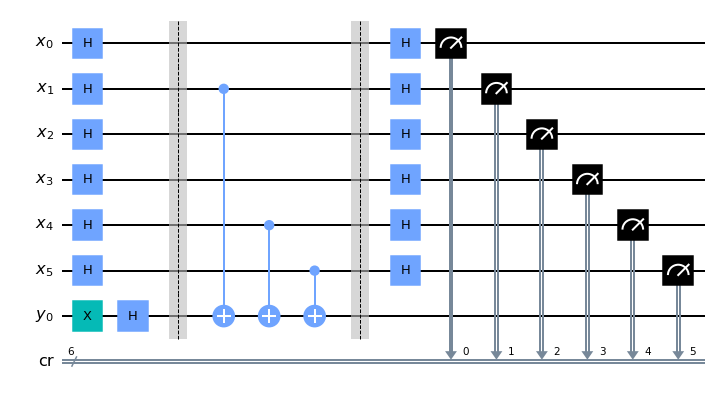

In [7]:
def dj_balanced():
    n = 6
    # BEGIN SOLUTION
    qc = QuantumCircuit()
    qc.add_register(QuantumRegister(n, 'x'))
    qc.add_register(QuantumRegister(1, 'y'))
    qc.add_register(ClassicalRegister(n, 'cr'))

    qc.x(n)
    for i in range(n+1):
        qc.h(i)
        
    qc.barrier()
    
    for i in [1,4,5]:
        qc.cx(i,n)
        
    qc.barrier()

    for i in range(n):
        qc.h(i)
        qc.measure(i,i)
    return qc.reverse_bits()
    # END SOLUTION
    
dj_balanced().reverse_bits().draw(output='mpl')   

**Note**: If your circuit appears upside-down, your circuit is using Qiskit's little endian ordering! Use one of the functions given in previous assignments to return a big endian result.

Run the below cell to help debug your circuit.

In [8]:
qasm_sim = BasicAer.get_backend("qasm_simulator")
job = execute(dj_balanced(), qasm_sim)
counts = job.result().get_counts()
print("State    Probability")
print("--------------------")
for state, count in sorted(counts.items(), key=lambda tup: tup[1], reverse=True):
    print("|"+state+">", str(count/1024*100)+"%")

State    Probability
--------------------
|010011> 100.0%


In [9]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0
failure_message: expected 6 bit output
""" # END TEST CONFIG

def test_num_bits2():
    n = 6
    djbal = dj_balanced()
    return djbal.num_clbits == n and djbal.num_qubits == n+1
    
test_num_bits2() == True

True

In [10]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0
failure_message: amplitude is not entirely on |010011>
""" # END TEST CONFIG

def test_balanced_output():    
    qasm_sim = BasicAer.get_backend("qasm_simulator")
    job = execute(dj_balanced(), qasm_sim)
    counts = job.result().get_counts()
    return len(counts) == 1 and counts['010011'] == 1024
    
test_balanced_output()

True

In [11]:
""" # BEGIN TEST CONFIG
hidden: false
points: 20
failure_message: one of the above tests is not passing
""" # END TEST CONFIG
def test_num_bits2():
    n = 6
    djbal = dj_balanced()
    return djbal.num_clbits == n and djbal.num_qubits == n+1

def test_balanced_output():    
    qasm_sim = BasicAer.get_backend("qasm_simulator")
    job = execute(dj_balanced(), qasm_sim)
    counts = job.result().get_counts()
    return len(counts) == 1 and counts['010011'] == 1024

def award_credit2():
    return test_num_bits2() and test_balanced_output()

award_credit2() == True

True

#### Task 3A - Examining $f(x)$ (10 pts)

For tasks 3A-3D, we've provided you with a function`an_oracle` that returns a [multi-controlled X gate](https://qiskit.org/documentation/stubs/qiskit.circuit.library.MCXGate.html#qiskit.circuit.library.MCXGate) oracle.

In [12]:
def an_oracle(qc, n):
    qc.barrier()
    qc.mcx([i for i in range(n-1)],n)
    qc.barrier()
    return qc

def display_harness(n):
    qc = QuantumCircuit()
    qc.add_register(QuantumRegister(n, 'x'))
    qc.add_register(QuantumRegister(1, 'y'))
    qc.add_register(ClassicalRegister(n, 'cr'))
    qc = an_oracle(qc, n)
    return qc

Running the following cell shows the oracle generated for the case of $n=3$. 

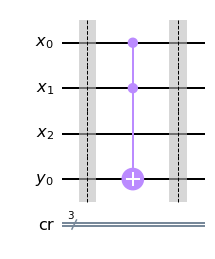

In [13]:
display_harness(3).draw(output='mpl')

We wish to characterize this oracle to determine whether it keeps its promise. As seen in lecture, one way to do this is to write out a table of $f(x)$ for all combinations of inputs.

| x_0 | x_1 | x_2 | y | f(x) |
|-----|-----|-----|---|------|
| 0   | 0   | 0   | 0 |      |
| 0   | 0   | 0   | 1 |      |
| 0   | 0   | 1   | 0 |      |
| 0   | 0   | 1   | 1 |      |
| 0   | 1   | 0   | 0 |      |
| 0   | 1   | 0   | 1 |      |
| 0   | 1   | 1   | 0 |      |
| 0   | 1   | 1   | 1 |      |
| 1   | 0   | 0   | 0 |      |
| 1   | 0   | 0   | 1 |      |
| 1   | 0   | 1   | 0 |      |
| 1   | 0   | 1   | 1 |      |
| 1   | 1   | 0   | 0 |      |
| 1   | 1   | 0   | 1 |      |
| 1   | 1   | 1   | 0 |      |
| 1   | 1   | 1   | 1 |      |

Refer back to the 02 Reversible Computations lecture for a refresher on the [Toffoli gate](https://en.wikipedia.org/wiki/Toffoli_gate). 

If the table were complete, what would be the sum of the $f(x)$ column?

The sum is 4--only rows where $x_0$ and $x_1$ are both 1 make $f(x)=1$.

#### Task 3B - Oracle Characterization (25 pts)

For $n=3$, characterize the oracle as a **constant** or **balanced** function or **neither**. Be sure to explain how you can tell.
- If the oracle is a **balanced** function or **neither**, also explain how you can add a single gate to turn the oracle into a **constant** function

For $n=3$, the oracle does not keep its promise and hence it is **neither** a constant or balanced function. We can see this because a constant function would have all rows of the table from 3A be the same and a balanced function would have half zeros and half ones. Since 4/16=25% are ones, it's neither constant or balanced.

You can add another multi-controlled X gate to turn the oracle into a constant since MCX is its own inverse and the result will be a $f(x)=0$ oracle.

#### Task 3C - Oracle Analysis  (25 pts)

For which value(s) of $n$ does `an_oracle` return a valid, **constant** Deutsch-Josza oracle?
- What is the constant value of $f(x)$?

For which value(s) of $n$ does `an_oracle` return a valid, **balanced** Deutsch-Josza oracle?
- What state has 100% of the amplitude on it?

For which value(s) of $n$ does `an_oracle` **not** return a valid Deutsch-Josza oracle?

This is a valid, constant DJ oracle for $n=1$. Since no gates are applied, the oracle represents $f(x)=0$.

This is a valid, balanced DJ oracle for $n=2$. All of the amplitude is on the $|10\rangle$ term. This is a balanced parity function like in Task 2; the MCX effectively acts as a single CX on the first qubit).

For $n\geq 3$, `an_oracle` does not return a valid Deutsch-Josza oracle.

#### Task 3D - Run on IBM (10 pts)

- Fill in the `dj_harness` function below with complete Deutsch-Josza circuitry around the oracle
- Run the completed `dj_harness` circuit on an IBM machine over `1024` trials with `n=3`
- Store the result in `counts` and observe the resulting histogram

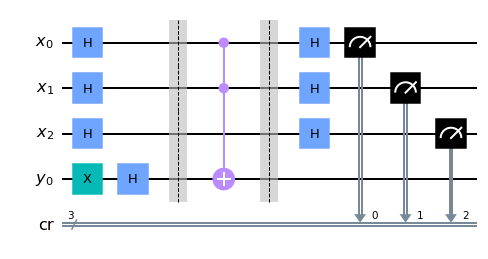

In [14]:
def dj_harness(n):
    
    # BEGIN SOLUTION
    qc = QuantumCircuit()
    qc.add_register(QuantumRegister(n, 'x'))
    qc.add_register(QuantumRegister(1, 'y'))
    qc.add_register(ClassicalRegister(n, 'cr'))
    qc.x(n)
    for i in range(n+1):
        qc.h(i)
    # END SOLUTION
    
    qc = an_oracle(qc, n)
    
    # BEGIN SOLUTION
    for i in range(n):
        qc.h(i)
        qc.measure(i,i)
    # END SOLUTION
    
    return qc
    
dj_harness(3).draw(output='mpl')

ibmqfactory.load_account:WARNING:2022-03-31 09:59:05,680: Credentials are already in use. The existing account in the session will be replaced.


Check job status here: https://quantum-computing.ibm.com/jobs/6245c1bd2b72611370735f05


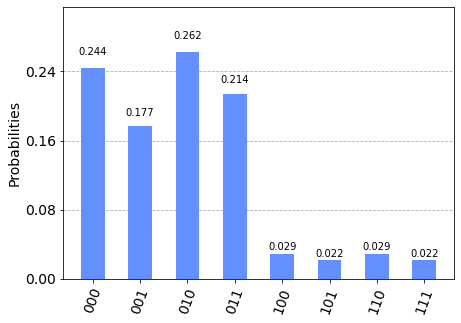

In [16]:
# run your IBM job in this cell
IBMQ.load_account()

# BEGIN SOLUTION
ibmqc = IBMQ.get_provider(hub='ibm-q').get_backend('ibmq__')
job = execute(dj_harness(3), ibmqc, shots=1024)
print("Check job status here:", "https://quantum-computing.ibm.com/jobs/" + job.job_id())
res = job.result()
counts = res.get_counts()
# END SOLUTION

plot_histogram(counts)